In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run load_data.py

/home/zhampel/py-venv/python3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load an image and get its label
img_id = 10
#head_dir='/Users/zhampel/insight/project/data/mnist/pngs'
head_dir='/home/zhampel/insight/data/mnist/pngs'
filepath=head_dir+'/training/'
img, label = load_img(path_to_data=filepath, img_id=img_id, file_type='png')
print(img.shape)

(28, 28)


0.0 0.99607843
3


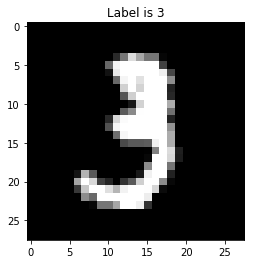

In [4]:
# Display the image
print(np.min(img), np.max(img))
print(label)
plt.title('Label is {label}'.format(label=label))
plt.imshow(img, cmap='gray')
plt.show()

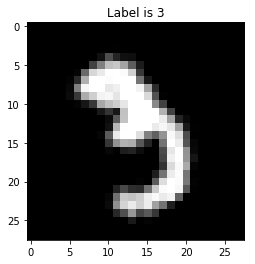

In [5]:
# Rotate the image and display
rot_img = rotate_image(img, 35.)
plt.title('Label is {label}'.format(label=label))
plt.imshow(rot_img, cmap='gray')
plt.show()

In [6]:
%run plots.py

<Figure size 432x288 with 0 Axes>

/home/zhampel/py-venv/python3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


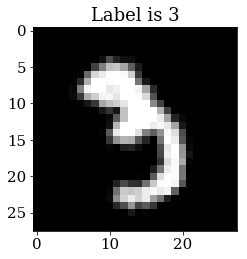

In [7]:
plot_image(rot_img, cmap='gray', label=label)

# Test generator function

In [9]:
trainpath=head_dir+'/training/'
train_gen = img_generator(path_to_data=filepath, batch_size=3, n_classes=10, samples=[0,60000])

In [10]:
dat, labs = next(train_gen)

(3, 28, 28, 1)
(3, 10)


/home/zhampel/py-venv/python3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


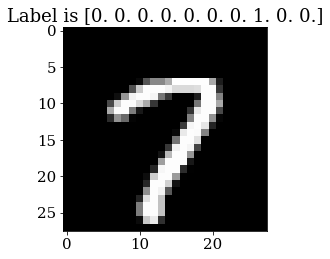

In [11]:
print(dat.shape)
print(labs.shape)
plot_image(dat[0,:,:,0], cmap='gray', label=labs[0])

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671)
np.set_printoptions(threshold='nan')

In [13]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

In [14]:
# Specifics
batch_size = 128
epochs = 10

class History(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [15]:
img, label = load_img(filepath, img_id=10, file_type='png')
input_shape = (img.shape[0], img.shape[1], 1)
num_classes=10
# History
history = History()
# Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
trainpath=head_dir+'/training/'
train_gen = img_generator(filepath, batch_size=batch_size, n_classes=num_classes, samples=[0, 50000])

valpath=head_dir+'/training/'
valid_gen = img_generator(valpath, batch_size=batch_size, n_classes=num_classes, samples=[50000, 60000])

testpath=head_dir+'/testing/'
test_gen = img_generator(testpath, batch_size=batch_size, n_classes=num_classes, samples=[0,20000])

In [17]:
# Run the training
model.fit_generator(train_gen,
                    steps_per_epoch=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_gen,
                    validation_steps=10,
                    class_weight=None,
                    callbacks=[history])

Epoch 1/10
128/128 [==============================] - 64s 498ms/step - loss: 0.3455 - acc: 0.8987 - val_loss: 0.0875 - val_acc: 0.9766
Epoch 2/10
128/128 [==============================] - 60s 469ms/step - loss: 0.0889 - acc: 0.9738 - val_loss: 0.0596 - val_acc: 0.9797
Epoch 3/10
128/128 [==============================] - 59s 464ms/step - loss: 0.0601 - acc: 0.9820 - val_loss: 0.0774 - val_acc: 0.9805
Epoch 4/10
128/128 [==============================] - 60s 467ms/step - loss: 0.0450 - acc: 0.9869 - val_loss: 0.0518 - val_acc: 0.9867
Epoch 5/10
128/128 [==============================] - 59s 462ms/step - loss: 0.0394 - acc: 0.9868 - val_loss: 0.0449 - val_acc: 0.9852
Epoch 6/10
128/128 [==============================] - 60s 466ms/step - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0475 - val_acc: 0.9875
Epoch 7/10
128/128 [==============================] - 60s 466ms/step - loss: 0.0306 - acc: 0.9910 - val_loss: 0.0230 - val_acc: 0.9938
Epoch 8/10
128/128 [==============================] - 5

In [20]:
# Evaluate score
score = model.evaluate_generator(test_gen, steps=1, max_queue_size=10)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

StopIteration: 

/home/zhampel/py-venv/python3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


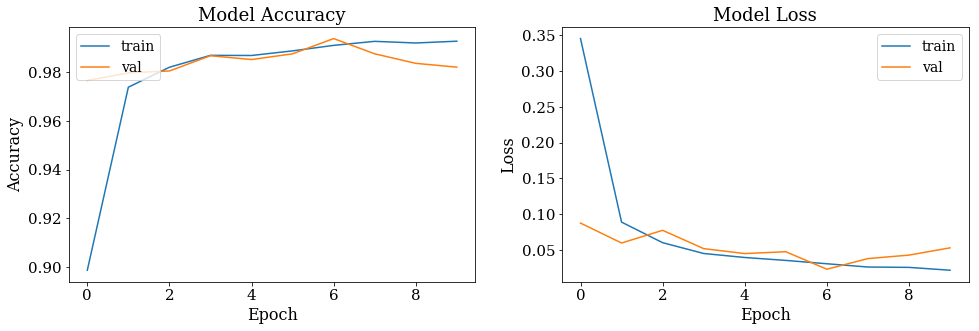

In [19]:
# Summarize history
f = plt.figure(figsize=(14,5))

# Summarize accuracy history
plt.subplot(1,2,1)
plt.plot(history.acc)
plt.plot(history.val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
# Summarize loss history
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.show()